<a href="https://colab.research.google.com/github/youngchanseo/Hon.Gong.Machine-SNU/blob/main/(06_1_2)_%ED%94%BD%EC%85%80%EA%B0%92_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과일 사진 데이터 준비하기

In [6]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')

--2024-02-08 20:14:34--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-02-08 20:14:34--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-02-08 20:14:35--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [9]:
# 데이터에는 사과, 바나나, 파인애플이 각각 100개씩 들어있음

#사용하기 쉽게 fruit data를 사과, 파인애플, 바나나로 나누어보자
# numpy 배열을 나눌떄 100* 100 이미지를 펼쳐서, 길이가 10,00인 1차원 배열로 만들기
#reshape() method: 두번째 차원 (100)과 세번 째 차원 (100)을 10,000으로 합침. 첫 번째 차원을 -1로 지정하면, 자동으로 남은 차원을 할당
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)
print("apple shape:",apple.shape)
print("apple 배열의 mean() method로 각 샘플의 픽셀 평균값 계산", apple.mean(axis=1))

apple shape: (100, 10000)
apple 배열의 mean() method로 각 샘플의 픽셀 평균값 계산 [ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


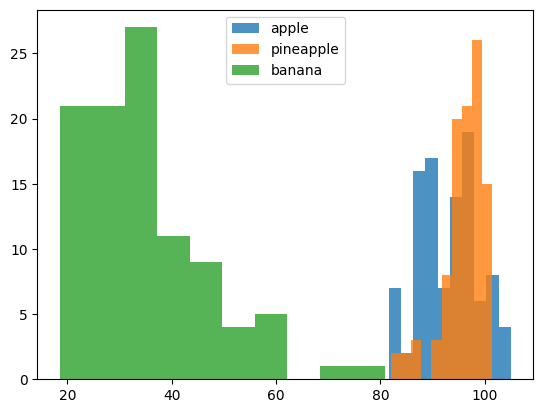

In [11]:

# alpha 매개변수를 1보다 작게: 투명도
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

#legend(): 범례
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

히스토그램을 보면 바나나 사진의 평균값: 40아래

사과와 파인애플: 90~100사이
  이 둘을 구분하기는 쉽지 않음


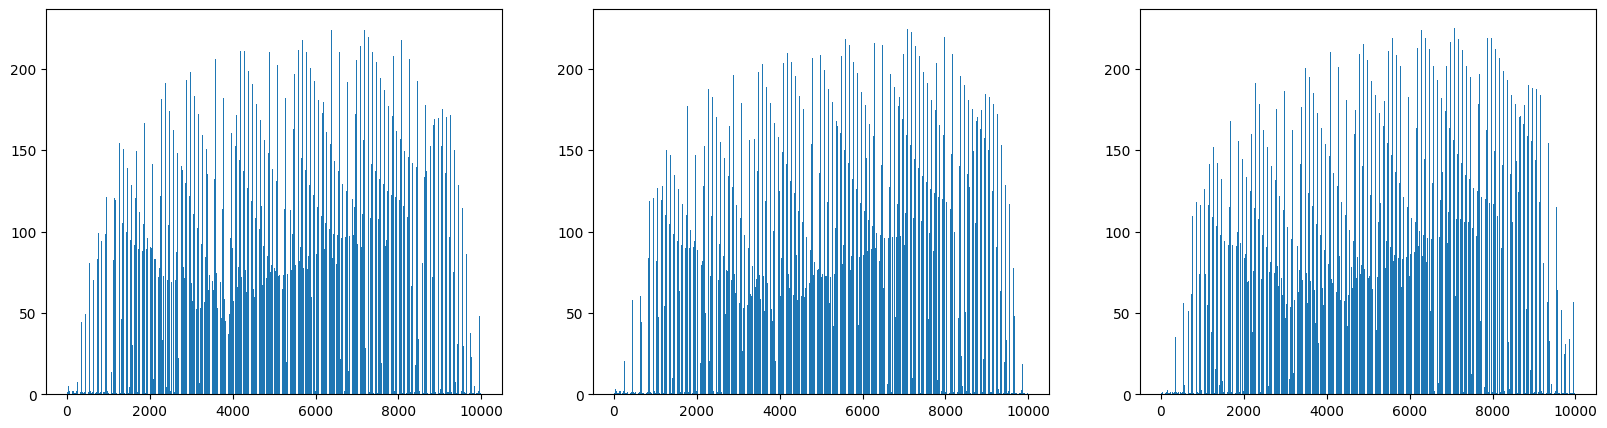

In [13]:
#전체 샘플에 대해 각 픽셀의 평균을 계산하자. 세 과일은 모양이 다르므로 pixel값이 높은 위치가 조금 다를 것임
#픽셀의 평균: axis = 0으로 지정

fig, axs =plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(apple, axis=0))
axs[2].bar(range(10000), np.mean(apple, axis=0))
plt.show()

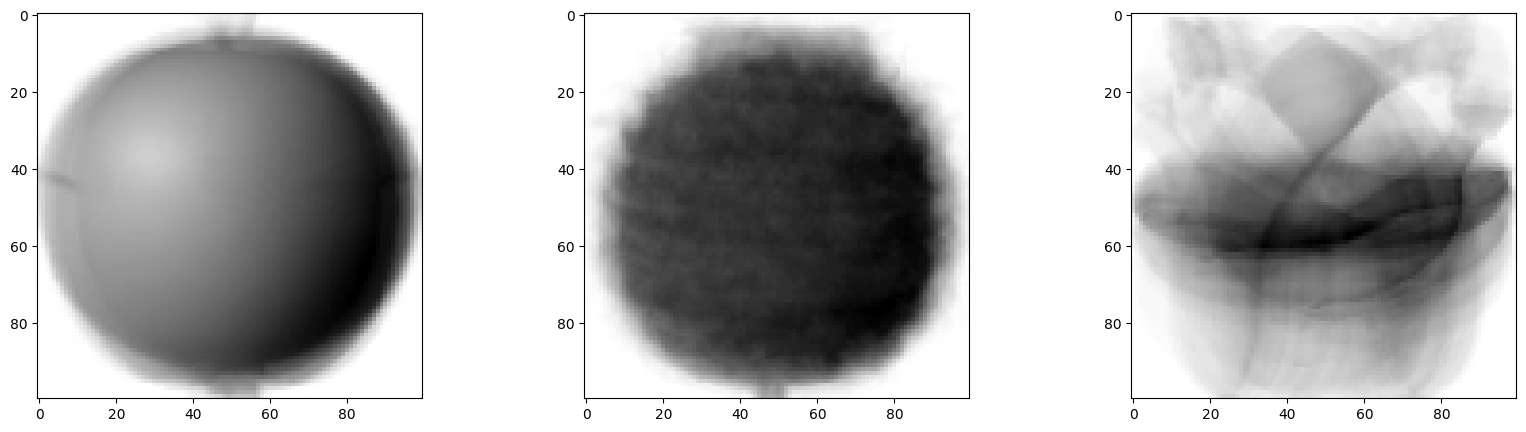

In [14]:
#위 사진은 순서대로 사과 , 파인애플, 바나나 그래프임
# 사과는 사진 아래쪽으로 갈 수록 값이 높아지고, 파인애플은 비교적 고르면서 높음. 바나나는 중앙의 픽셀값이 높음

#픽셀 평균값을 100*100크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교해보자

apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axs =plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()